In [1]:
#importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from tqdm import tqdm

from scipy import ndimage as ndi

from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install python3.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.6 is already the newest version (3.6.9-1~18.04ubuntu1.7).
python3.6 set to manually installed.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/fingerprint3.png',0)
img2 = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/fingerprint4.png',0)
img1.shape, img2.shape

((512, 512), (512, 512))

### 2.a

In [ ]:
def erosion_dilation(img):
    _, img_thres = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
    kernel = np.ones((5,5))
    erosion = cv2.erode(img_thres,kernel,iterations = 1)
    dilation = cv2.dilate(img_thres,kernel,iterations = 1)
    fig, axs = plt.subplots(2,2, figsize = (10,6))

    axs[0,0].imshow(img, cmap ='gray')
    axs[0,0].set_title("Original image")

    axs[0,1].imshow(img_thres, cmap = 'gray')
    axs[0,1].set_title("With Clarity image")

    axs[1,0].imshow(erosion, cmap = 'gray')
    axs[1,0].set_title("Erosion image")

    axs[1,1].imshow(dilation, cmap = 'gray')
    axs[1,1].set_title("Dilation image")

    plt.show()

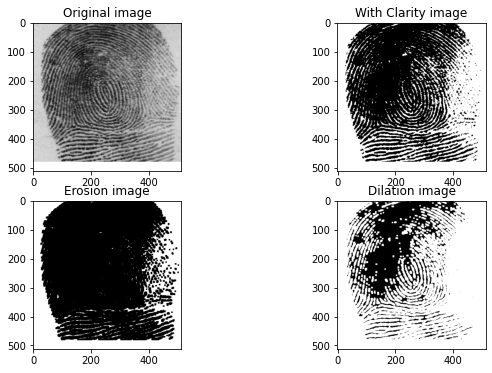

In [ ]:
erosion_dilation(img1)

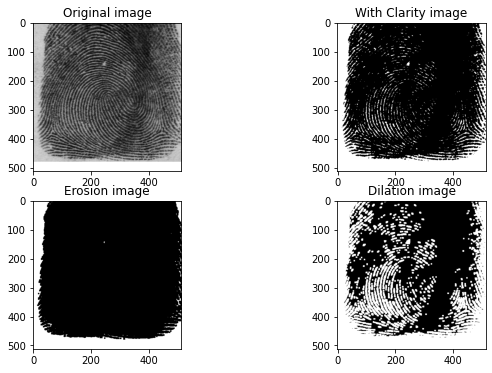

In [ ]:
erosion_dilation(img2)

### 2.b

**Round Kernel**

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/fingerprint5.png',0)
_, img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img_complement = 255 - img
_, img_complement_bin = cv2.threshold(img_complement,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
opening = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)

In [ ]:
opening_complement = cv2.morphologyEx(img_complement_bin, cv2.MORPH_OPEN, kernel)
closing_complement = cv2.morphologyEx(img_complement_bin, cv2.MORPH_CLOSE, kernel)

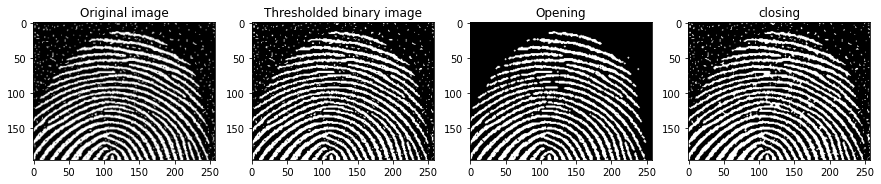

In [ ]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img, cmap ='gray')
axs[0].set_title("Original image")

axs[1].imshow(img_bin, cmap = 'gray')
axs[1].set_title("Thresholded binary image")

axs[2].imshow(opening,  cmap = 'gray')
axs[2].set_title("Opening")

axs[3].imshow(closing,  cmap = 'gray')
axs[3].set_title("closing")

plt.show()

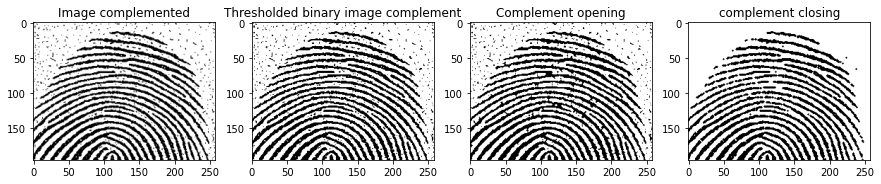

In [ ]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img_complement, cmap ='gray')
axs[0].set_title("Image complemented")

axs[1].imshow(img_complement_bin, cmap = 'gray')
axs[1].set_title("Thresholded binary image complement")

axs[2].imshow(opening_complement,  cmap = 'gray')
axs[2].set_title("Complement opening")

axs[3].imshow(closing_complement,  cmap = 'gray')
axs[3].set_title("complement closing")

plt.show()

**Box Kernel**

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
opening = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)

In [ ]:
opening_complement = cv2.morphologyEx(img_complement_bin, cv2.MORPH_OPEN, kernel)
closing_complement = cv2.morphologyEx(img_complement_bin, cv2.MORPH_CLOSE, kernel)

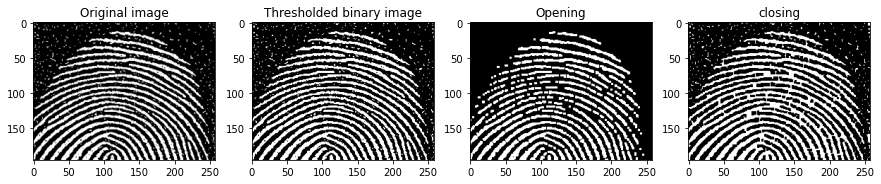

In [ ]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img, cmap ='gray')
axs[0].set_title("Original image")

axs[1].imshow(img_bin, cmap = 'gray')
axs[1].set_title("Thresholded binary image")

axs[2].imshow(opening,  cmap = 'gray')
axs[2].set_title("Opening")

axs[3].imshow(closing,  cmap = 'gray')
axs[3].set_title("closing")

plt.show()

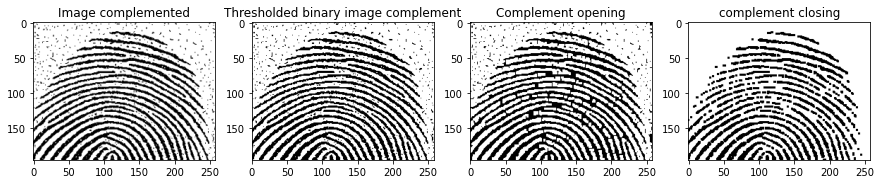

In [ ]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img_complement, cmap ='gray')
axs[0].set_title("Image complemented")

axs[1].imshow(img_complement_bin, cmap = 'gray')
axs[1].set_title("Thresholded binary image complement")

axs[2].imshow(opening_complement,  cmap = 'gray')
axs[2].set_title("Complement opening")

axs[3].imshow(closing_complement,  cmap = 'gray')
axs[3].set_title("complement closing")

plt.show()

### 2.c

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/market.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K_list = [2,3,4,5,6,8,10,12,15,18,20]
segmented_images = {}

for K in K_list:
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    segmented_images[K] = res2

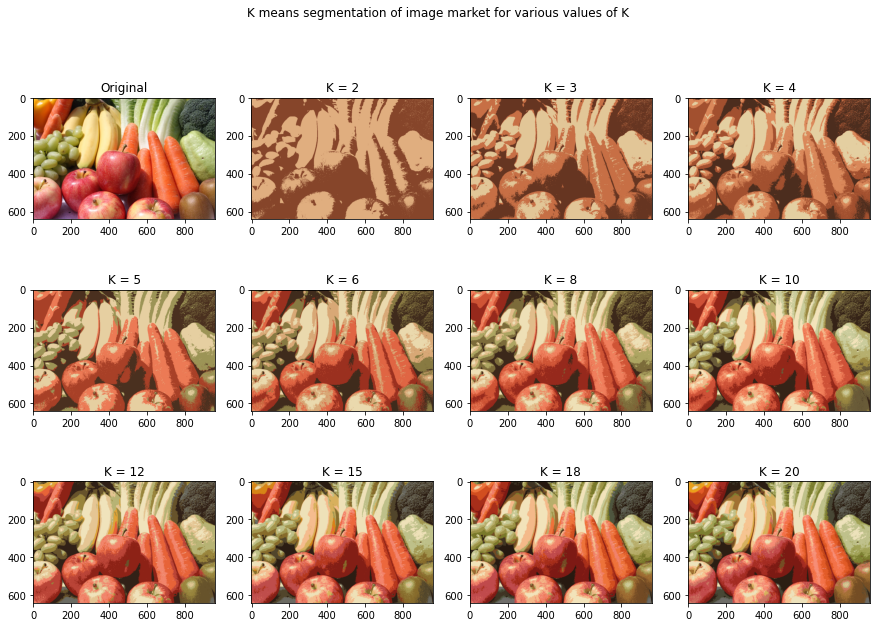

In [ ]:
fig, axs = plt.subplots(3,4, figsize = (15,10))

axs[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0,0].set_title("Original")

i = 0
j = 1
for K in K_list:
    segmented = segmented_images[K]
    axs[i,j].imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    axs[i,j].set_title("K = {}".format(K))
    j+=1
    if j==4:
        i+=1
        j=0

plt.suptitle("K means segmentation of image market for various values of K")
plt.show()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/Pisa.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K_list = [2,3,4,5,6,8,10,12,15,18,20]
segmented_images = {}

for K in K_list:
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    segmented_images[K] = res2

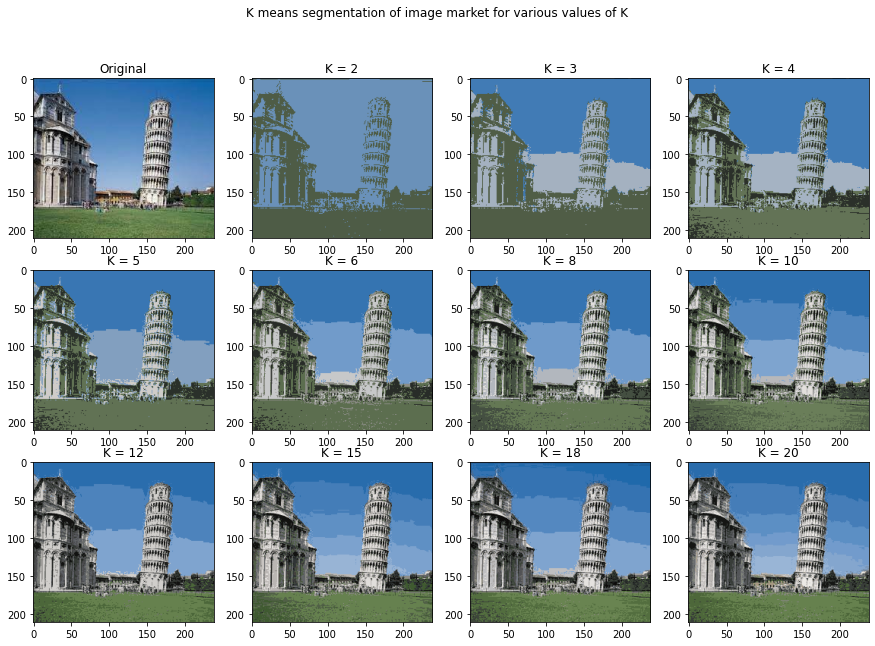

In [ ]:
fig, axs = plt.subplots(3,4, figsize = (15,10))

axs[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0,0].set_title("Original")

i = 0
j = 1
for K in K_list:
    segmented = segmented_images[K]
    axs[i,j].imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    axs[i,j].set_title("K = {}".format(K))
    j+=1
    if j==4:
        i+=1
        j=0

plt.suptitle("K means segmentation of image market for various values of K")
plt.show()

So from the results it is evident that while we increase the number of bins, resulting image gets closer to the actual image. 

### 2.d

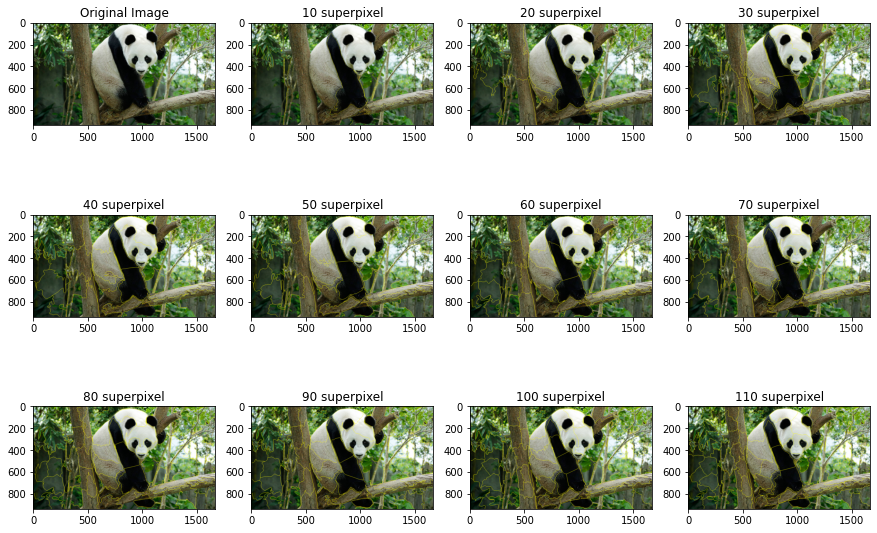

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

img = img_as_float(io.imread("/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/panda.jpeg"))
fig, axs = plt.subplots(3,4,figsize=(15,10))

axs[0,0].imshow(img)
axs[0,0].set_title('Original Image')

i,j = 0,1

for superpixel in range(10,120, 10):
    segment = slic(img, n_segments= superpixel, sigma=5)
    axs[i,j].imshow(mark_boundaries(img, segment))
    axs[i,j].set_title(f"{superpixel} superpixel")
    j+=1
    if j==4:
        j=0
        i+=1

plt.show()

From the plots we see that upto 40 superpixel segments, the segmentation gives an idea of the image without losing meaning.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

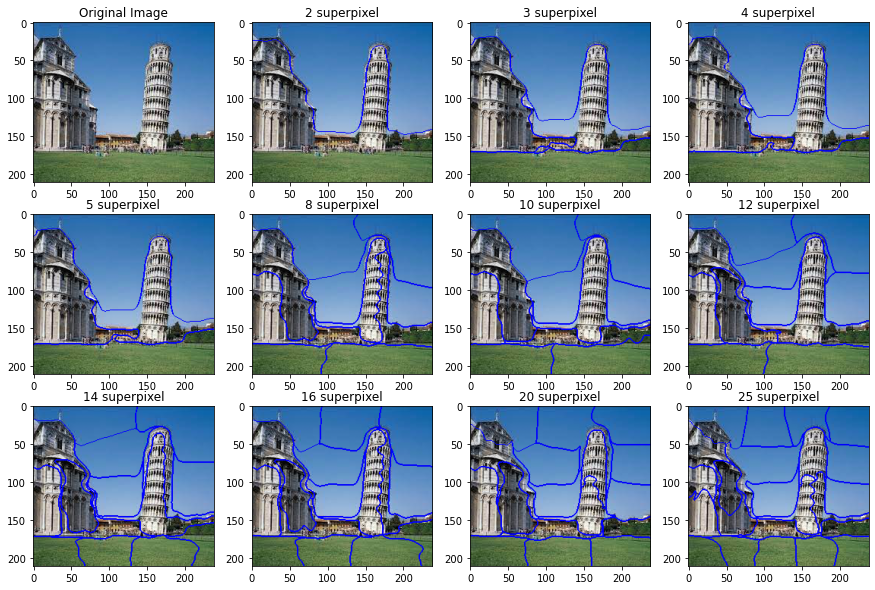

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

img = img_as_float(io.imread("/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/Pisa.jpg"))
fig, axs = plt.subplots(3,4,figsize=(15,10))

axs[0,0].imshow(img)
axs[0,0].set_title('Original Image')

i,j = 0,1

for superpixel in [2,3,4,5,8,10,12,14,16,20,25]:
    segment = slic(img, n_segments= superpixel, sigma=5)
    axs[i,j].imshow(mark_boundaries(img, segment, color = (0,0,255)))
    axs[i,j].set_title(f"{superpixel} superpixel")
    j+=1
    if j==4:
        j=0
        i+=1

plt.show()


From the plots we see that upto 5 superpixel segments, the segmentation gives an idea of the image without losing meaning.

### 2.e

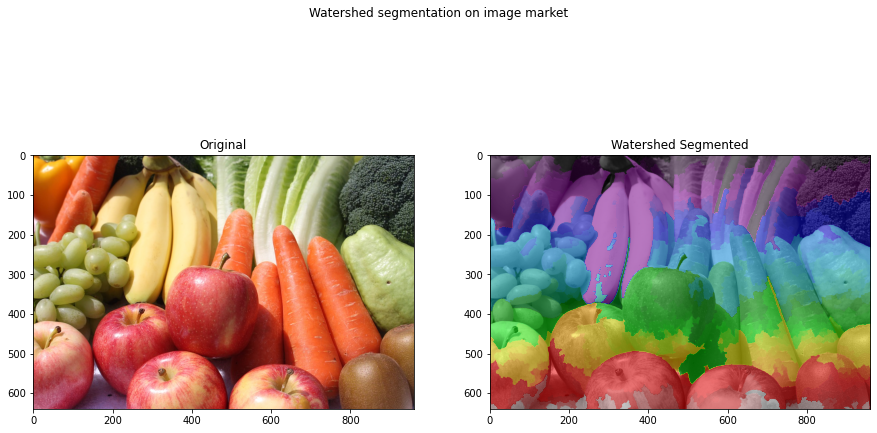

In [ ]:
original = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/market.jpg')
image = img_as_ubyte(cv2.cvtColor(original, cv2.COLOR_BGR2GRAY))

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axs = plt.subplots(1,2, figsize = (15,8))


axs[0].imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))
axs[0].set_title("Original")


axs[1].imshow(image, cmap=plt.cm.gray)
axs[1].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
axs[1].set_title("Watershed Segmented")

plt.suptitle("Watershed segmentation on image market")
plt.show()

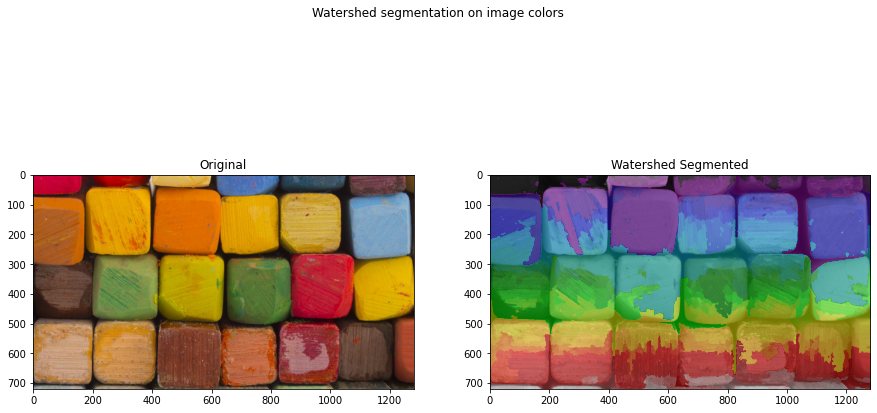

In [ ]:
original = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/Colors.png')
image = img_as_ubyte(cv2.cvtColor(original, cv2.COLOR_BGR2GRAY))

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axs = plt.subplots(1,2, figsize = (15,8))


axs[0].imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))
axs[0].set_title("Original")


axs[1].imshow(image, cmap=plt.cm.gray)
axs[1].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
axs[1].set_title("Watershed Segmented")

plt.suptitle("Watershed segmentation on image colors")
plt.show()

### 3.

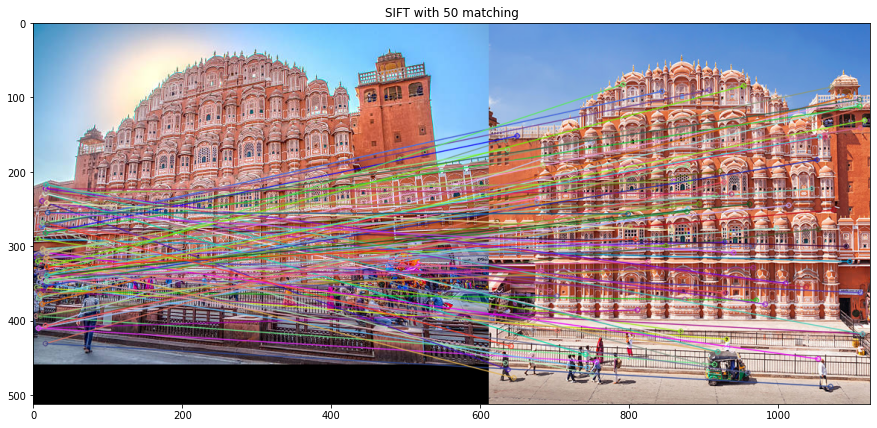

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/hawamahal1.jpg')          # queryImage
img2 = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/ComputerVision/hawamahal2.jpg') # trainImage
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
#matches = sorted(matches, key = lambda x:x.distance)
# Apply ratio test
good = matches[:50]
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig = plt.figure(figsize = (15,10))
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
plt.title("SIFT with 50 matching")
plt.show()